# Suite de l'analyse précédente focalisée sur les détails du graph

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

datas = pd.read_csv("equipment_1.csv")
datas["DateTime_s"] = datas["DateTime_s"].astype("<M8[s]")

datas

,DataMeasurementId,DateTime,SensorId,Value,Raw,diff_time,Name,DateTime_s
0,1,2021-10-18 10:13:28.415,1,19.1,19.1,NaN,InletTemp-sensor,2021-10-18 10:13:28
1,2,2021-10-18 10:13:28.446,2,29.0,29.0,0.031,SetTemp-sensor,2021-10-18 10:13:28
2,3,2021-10-18 10:13:28.469,4,4.0,3005,0.023,FanSpeed-sensor,2021-10-18 10:13:28
3,4,2021-10-18 10:13:28.481,5,2.0,HEAT,0.012,Mode-sensor,2021-10-18 10:13:28
4,260,2021-10-18 11:34:33.376,1,19.2,19.2,4864.895,InletTemp-sensor,2021-10-18 11:34:33
...,...,...,...,...,...,...,...,...
2853,68008,2021-11-21 14:13:51.486,1,21.3,21.3,660.428,InletTemp-sensor,2021-11-21 14:13:51
2854,68040,2021-11-21 14:50:46.932,1,21.6,21.6,2215.446,InletTemp-sensor,2021-11-21 14:50:46
2855,68063,2021-11-21 15:08:47.641,1,21.8,21.8,1080.709,InletTemp-sensor,2021-11-21 15:08:47
2856,68069,2021-11-21 15:18:48.060,1,21.6,21.6,600.419,InletTemp-sensor,2021-11-21 15:18:48


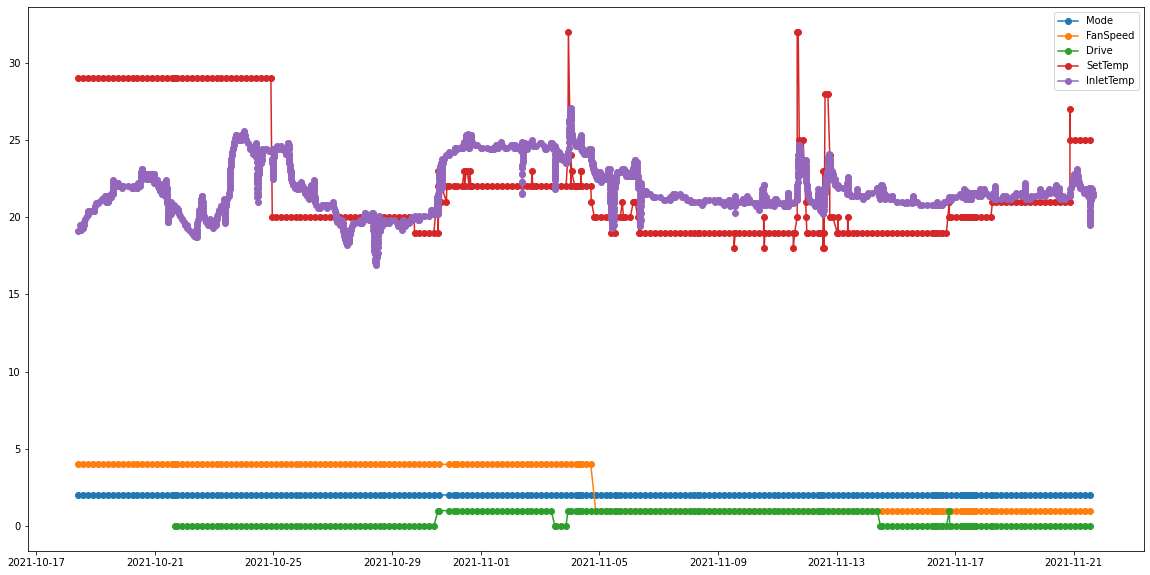

In [11]:
fig = plt.figure(figsize=(20, 10))

labels= ["InletTemp", "SetTemp", "Drive", "FanSpeed", "Mode"]

for i, label in zip(reversed(range(6)), reversed(labels)):
    capteur = datas.loc[datas["SensorId"] == i , ["Value", "DateTime_s"]]
    plt.plot_date("DateTime_s", "Value", data= capteur, ls= "-", label= label)

plt.legend()
plt.show()

Quelle est la température moyenne pour capteur 3 =0 et =1?

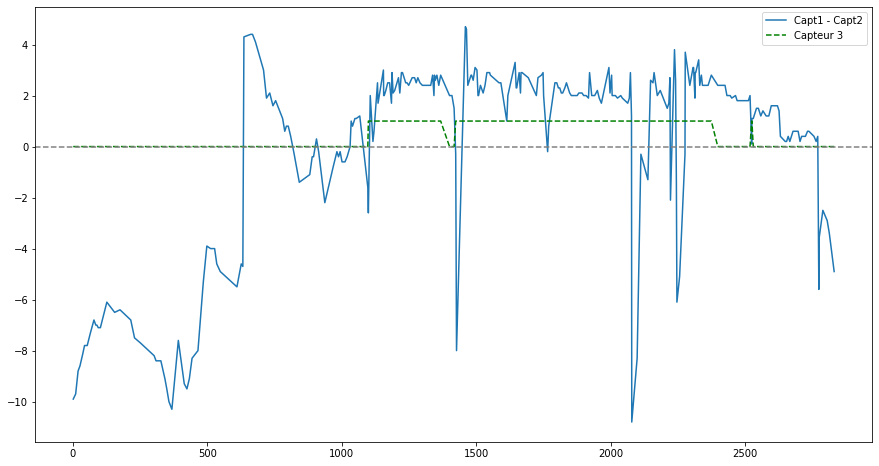

In [12]:
capt2 = pd.DataFrame(datas.loc[datas["SensorId"] == 2, "Value"])

capt1 = []
for idx in capt2.index:
    for i in range(1, 10):
        if datas.loc[idx -i, "SensorId"] == 1:
            capt1.append(datas.loc[idx -i, "Value"])
            break
capt1 = pd.DataFrame(capt1, columns= ["Value"], index= capt2.index)

capt3 = []
for idx in capt2.index:
    for i in range(1, 500):
        if idx -i < 0:
            capt3.append(0)
            break
        elif datas.loc[idx -i, "SensorId"] == 3:
            capt3.append(datas.loc[idx -i, "Value"])
            break
capt3 = pd.DataFrame(capt3, columns= ["Value"], index= capt2.index)

fig = plt.figure(figsize=(15, 8))

plt.plot(capt1 - capt2, label= "Capt1 - Capt2")
plt.plot(capt3, "g--", label= "Capteur 3")

plt.legend()
plt.axhline(0, c= "grey", ls= "--")
plt.show()

Je vais afficher un détail des données jusqu'au 01/11/2021.

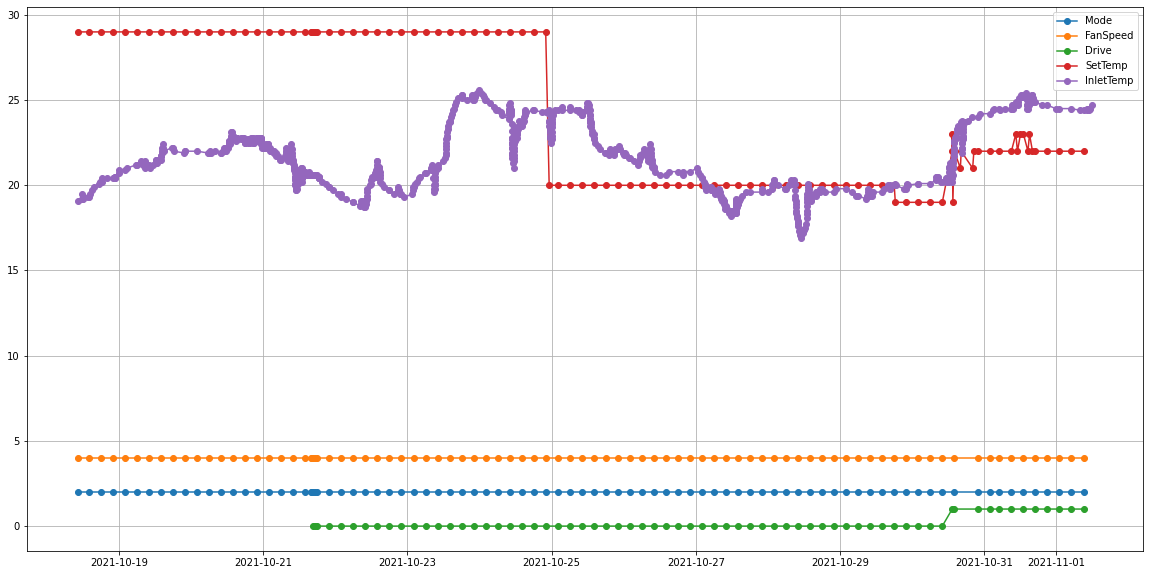

In [13]:
fig = plt.figure(figsize=(20, 10))

labels= ["InletTemp", "SetTemp", "Drive", "FanSpeed", "Mode"]

for i, label in zip(reversed(range(6)), reversed(labels)):
    capteur = datas.loc[(datas["SensorId"] == i) & (datas["DateTime_s"] <= 
        pd.to_datetime("2021-11-01 12:00:00")) 
        & (datas["DateTime_s"] >= pd.to_datetime("2021-10-17 00:00:00"))
        , ["Value", "DateTime_s"]]
    plt.plot_date("DateTime_s", "Value", data= capteur, ls= "-", label= label)

plt.legend()
plt.grid()
plt.show()

Je vais analyser les délais entre l'activation du capteur précendant et le capteur 2.

Pour ça, je vais découper le jeu en plusieurs dates:
* 2021-10-17 00:00:00 à 2021-10-24 00:00:00
* 2021-10-24 00:00:00 à 2021-10-26 00:00:00
* 2021-10-26 00:00:00 à 2021-10-29 12:00:00
* 2021-10-29 12:00:00 à 2021-10-30 12:00:00
* 2021-10-30 12:00:00 à 2021-11-01 00:00:00

~~Pourquoi "SetTemp" baisse d'un coup de 29 à 20 peu avant le 25-10-2021 00:00:00?~~
* ~~Vu le délai de temps (4161.359 s) entre l'activation de ce capteur et le précédent, il s'agit probablement d'une action manuelle.~~

~~Je vais aussi investiguer pour les dates entre le 29-10-2021 00:00:00 et le 31-10-2021 00:00:00.~~
* ~~Idem que plus haut avec un délai de 1298.386 pour le 29-10-2021 18:21:42~~

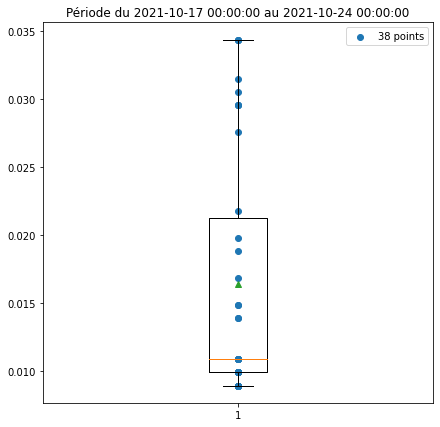

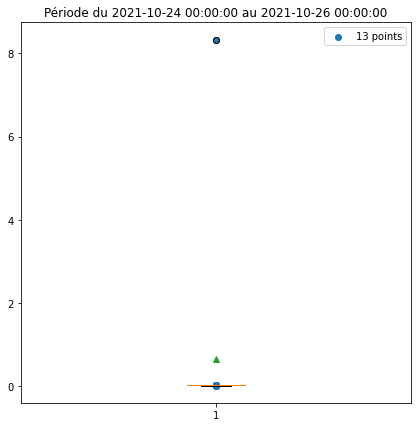

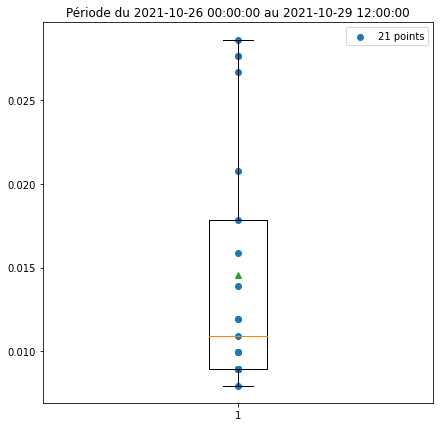

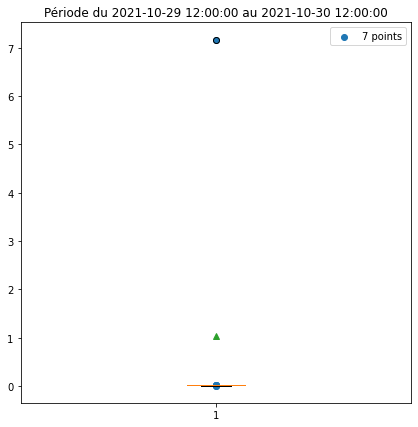

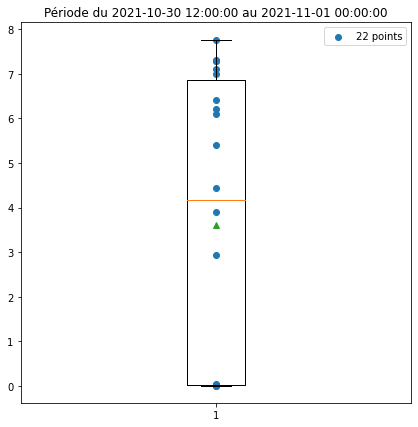

In [14]:
start_time = ["2021-10-17 00:00:00", "2021-10-24 00:00:00", "2021-10-26 00:00:00", 
    "2021-10-29 12:00:00", "2021-10-30 12:00:00"]
end_time = ["2021-10-24 00:00:00", "2021-10-26 00:00:00", "2021-10-29 12:00:00", 
    "2021-10-30 12:00:00", "2021-11-01 00:00:00"]

for start, end in zip(start_time, end_time):
    test = datas.loc[(datas["DateTime_s"] >= pd.to_datetime(start)) & 
        (datas["DateTime_s"] <= pd.to_datetime(end)) &
        (datas["SensorId"] == 2), "diff_time"]
    
    test = np.log(test +1)

    fig = plt.figure(figsize=(7, 7))
    plt.boxplot(test, vert= True, showmeans= True)
    plt.scatter([1 for x in range(len(test))], test, label= f"{len(test)} points")

    plt.legend()
    plt.title(f"Période du {start} au {end}")
    plt.show()

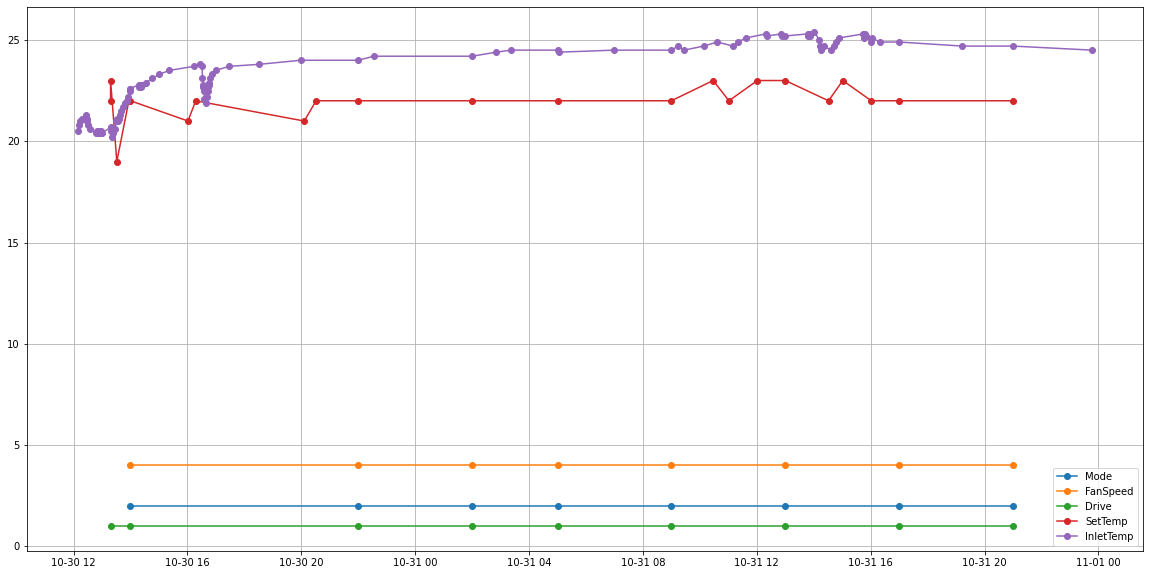

In [15]:
fig = plt.figure(figsize=(20, 10))

labels= ["InletTemp", "SetTemp", "Drive", "FanSpeed", "Mode"]

for i, label in zip(reversed(range(6)), reversed(labels)):
    capteur = datas.loc[(datas["SensorId"] == i) & (datas["DateTime_s"] >= 
        pd.to_datetime("2021-10-30 12:00:00")) & (datas["DateTime_s"] <= 
        pd.to_datetime("2021-11-01 00:00:00")), ["Value", "DateTime_s"]]
    plt.plot_date("DateTime_s", "Value", data= capteur, ls= "-", label= label)

plt.legend()
plt.grid()
plt.show()

In [16]:
datas[(datas["DateTime_s"] >= pd.to_datetime("2021-10-24 12:00:00")) & 
    (datas["DateTime_s"] <= pd.to_datetime("2021-10-25 00:00:00"))]

,DataMeasurementId,DateTime,SensorId,Value,Raw,diff_time,Name,DateTime_s
592,12702,2021-10-24 12:04:12.142,1,23.0,23.0,360.242,InletTemp-sensor,2021-10-24 12:04:12
593,12750,2021-10-24 12:16:12.598,1,23.2,23.2,720.456,InletTemp-sensor,2021-10-24 12:16:12
594,12758,2021-10-24 12:18:12.662,1,23.0,23.0,120.064,InletTemp-sensor,2021-10-24 12:18:12
595,12762,2021-10-24 12:19:12.698,1,22.8,22.8,60.036,InletTemp-sensor,2021-10-24 12:19:12
596,12768,2021-10-24 12:21:12.766,1,23.0,23.0,120.068,InletTemp-sensor,2021-10-24 12:21:12
597,12793,2021-10-24 12:27:13.018,1,23.2,23.2,360.252,InletTemp-sensor,2021-10-24 12:27:13
598,12795,2021-10-24 12:28:13.071,1,23.4,23.4,60.053,InletTemp-sensor,2021-10-24 12:28:13
599,12812,2021-10-24 12:34:13.296,1,23.1,23.1,360.225,InletTemp-sensor,2021-10-24 12:34:13
600,12836,2021-10-24 12:39:07.470,1,23.3,23.3,294.174,InletTemp-sensor,2021-10-24 12:39:07
601,12944,2021-10-24 13:08:08.599,1,23.5,23.5,1741.129,InletTemp-sensor,2021-10-24 13:08:08


Je vais afficher un détail des données du 01/11/2021 au 05/11/2021.

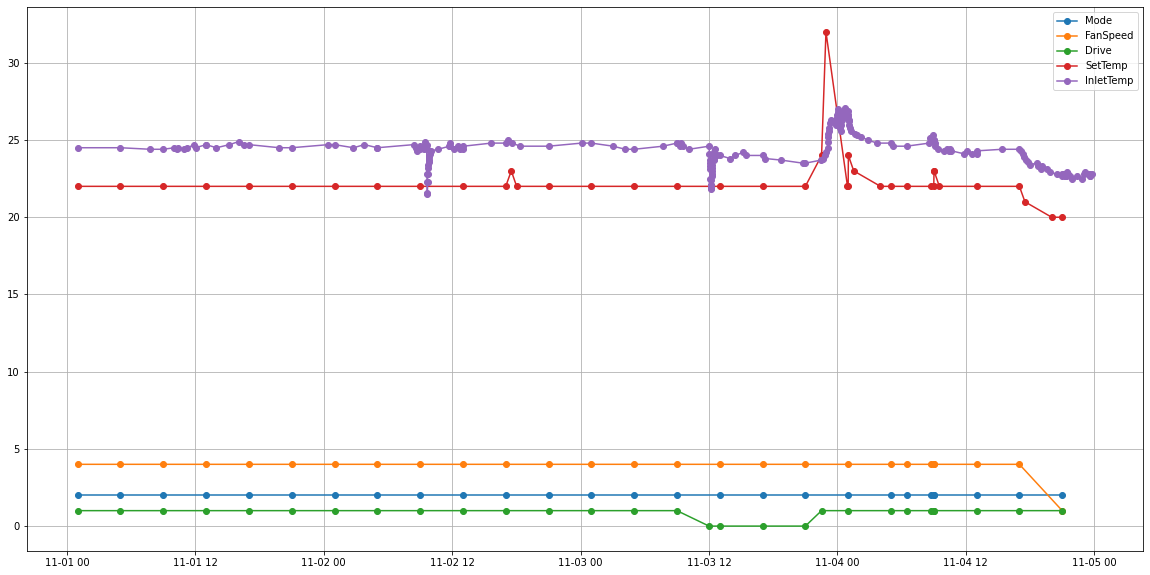

In [17]:
fig = plt.figure(figsize=(20, 10))

labels= ["InletTemp", "SetTemp", "Drive", "FanSpeed", "Mode"]

for i, label in zip(reversed(range(6)), reversed(labels)):
    capteur = datas.loc[(datas["SensorId"] == i) & (datas["DateTime_s"] >= 
        pd.to_datetime("2021-11-01 00:00:00")) & (datas["DateTime_s"] <= 
        pd.to_datetime("2021-11-05 00:00:00")), ["Value", "DateTime_s"]]
    plt.plot_date("DateTime_s", "Value", data= capteur, ls= "-", label= label)

plt.legend()
plt.grid()
plt.show()

In [18]:
datas[(datas["DateTime_s"] >= pd.to_datetime("2021-11-03 18:00:00")) & 
    (datas["DateTime_s"] <= pd.to_datetime("2021-11-04 00:00:00"))]

,DataMeasurementId,DateTime,SensorId,Value,Raw,diff_time,Name,DateTime_s
1415,36472,2021-11-03 18:44:17.333,1,23.7,23.7,5277.362,InletTemp-sensor,2021-11-03 18:44:17
1416,36509,2021-11-03 20:46:22.038,1,23.5,23.5,7324.705,InletTemp-sensor,2021-11-03 20:46:22
1417,36514,2021-11-03 21:00:04.171,1,23.5,23.5,822.133,InletTemp-sensor,2021-11-03 21:00:04
1418,36515,2021-11-03 21:00:04.180,2,22.0,22.0,0.009,SetTemp-sensor,2021-11-03 21:00:04
1419,36516,2021-11-03 21:00:04.189,3,0.0,2,0.009,Drive-sensor,2021-11-03 21:00:04
1420,36517,2021-11-03 21:00:04.200,4,4.0,3005,0.011,FanSpeed-sensor,2021-11-03 21:00:04
1421,36518,2021-11-03 21:00:04.210,5,2.0,HEAT,0.010,Mode-sensor,2021-11-03 21:00:04
1422,36651,2021-11-03 22:28:19.950,1,23.7,23.7,5295.740,InletTemp-sensor,2021-11-03 22:28:19
1423,36655,2021-11-03 22:30:50.050,3,1.0,0,150.100,Drive-sensor,2021-11-03 22:30:50
1424,36656,2021-11-03 22:30:56.056,2,24.0,24.0,6.006,SetTemp-sensor,2021-11-03 22:30:56
